In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense_enc1 = nn.Linear(28*28, 256)
        self.dense_enc2 = nn.Linear(256, 64)
        self.dense_dec1 = nn.Linear(64, 256)
        self.dense_dec2 = nn.Linear(256, 28*28)
    
    def forward(self, x):
        x = F.relu(self.dense_enc1(x))
        x = F.relu(self.dense_enc2(x))
        x = F.relu(self.dense_dec1(x))
        x = torch.sigmoid(self.dense_dec2(x))
        return x
       
batch_size = 256
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

fashion_mnist_train = FashionMNIST("FashionMNIST", train=True, download=True, transform=transform)
fashion_mnist_test = FashionMNIST("FashionMNIST", train=False, download=True, transform=transform)


train_loader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fashion_mnist_test, batch_size=1, shuffle=True)

cpu


In [2]:
net = AE()
net.to(device)

optimizer = optim.Adam(net.parameters(), lr=0.01)
criterion = nn.MSELoss()
epoch_num = 20
running_loss = np.zeros(epoch_num)

for epoch in range(epoch_num):
    for i, data in enumerate(train_loader, 0):
        inputs = data[0].to(device)
        optimizer.zero_grad() 
        outputs = net(inputs)
        loss = criterion(inputs, outputs) 
        loss.backward() 
        optimizer.step() 
        running_loss[epoch] += loss.item()       
        
    running_loss[epoch] /= len(train_loader)

    print("epoch : %d, train_loss : %.4lf" % (epoch, running_loss[epoch]))
    

epoch : 0, train_loss : 0.0275
epoch : 1, train_loss : 0.0157
epoch : 2, train_loss : 0.0137
epoch : 3, train_loss : 0.0126
epoch : 4, train_loss : 0.0121
epoch : 5, train_loss : 0.0116
epoch : 6, train_loss : 0.0114
epoch : 7, train_loss : 0.0111
epoch : 8, train_loss : 0.0111
epoch : 9, train_loss : 0.0109
epoch : 10, train_loss : 0.0108
epoch : 11, train_loss : 0.0107
epoch : 12, train_loss : 0.0106
epoch : 13, train_loss : 0.0105
epoch : 14, train_loss : 0.0105
epoch : 15, train_loss : 0.0104
epoch : 16, train_loss : 0.0104
epoch : 17, train_loss : 0.0103
epoch : 18, train_loss : 0.0102
epoch : 19, train_loss : 0.0103


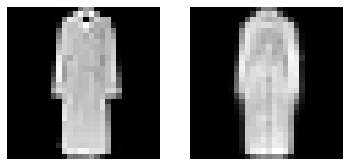

In [3]:
x, _ = next(iter(test_loader))
x = x.to(device)

x_rec = net(x)

for i, image in enumerate([x, x_rec]):
    #image = image.view(28, 28).detach().numpy()
    image = image.view(-1, 28, 28)
    image = image.squeeze().detach().numpy()
    plt.subplot(1, 2, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()